In [1]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
SAVE_PLOTS = False

save_path = 'plots/out_of_distribution_detection'

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["font.family"] = "serif"

In [8]:
# load data

# in-distribution data
with open(f'../out/bert_teacher/final_e3_lr2_hd020_ad020_cd030/results/results.json', 'r') as f:
    results_teacher = json.load(f)
    
with open('../out/bert_student/m5_k10/shen_2_lr0.0002_e4/results/results.json', 'r') as f:
    results_student = json.load(f)
    
with open('../out/bert_student_augmented/m5_k10/archived_prs0.1/shen_2_lr0.0002_e2_augmented/results/results.json', 'r') as f:
    results_augmented_student = json.load(f)

# out-of-distribution data - hate speech
with open('../out/out_of_distribution_detection/hate/results_bert_teacher.json') as f:
    results_teacher_hs = json.load(f)
    
with open('../out/out_of_distribution_detection/hate/results_bert_student.json') as f:
    results_student_hs = json.load(f)
    
with open('../out/out_of_distribution_detection/hate/results_bert_augmented_student_archived.json') as f:
    results_augmented_student_hs = json.load(f)
    
# out-of-distribution data - offensive language
with open('../out/out_of_distribution_detection/offensive/results_bert_teacher.json') as f:
    results_teacher_ol = json.load(f)
    
with open('../out/out_of_distribution_detection/offensive/results_bert_student.json') as f:
    results_student_ol = json.load(f)
    
with open('../out/out_of_distribution_detection/offensive/results_bert_augmented_student.json') as f:
    results_augmented_student_ol = json.load(f)
    
# out-of-distribution data - irony
with open('../out/out_of_distribution_detection/irony/results_bert_teacher.json') as f:
    results_teacher_ir = json.load(f)

with open('../out/out_of_distribution_detection/irony/results_bert_student.json') as f:
    results_student_ir = json.load(f)
    
with open('../out/out_of_distribution_detection/irony/results_bert_augmented_student_archived.json') as f:
    results_augmented_student_ir = json.load(f)

In [15]:
results_teacher['f1_score'], results_student['f1_score'], results_augmented_student['f1_score']

(0.9799758745476479, 0.9806576402321083, 0.9820213799805636)

In [9]:
results_teacher_hs['f1'], results_student_hs['f1'], results_augmented_student_hs['f1']

(0.5433838474404314, 0.533368428512758, 0.5307693372965039)

In [16]:
# results_teacher_ol['f1'], results_student_ol['f1'], results_augmented_student_ol['f1']

In [11]:
results_teacher_ir['f1'], results_student_ir['f1'], results_augmented_student_ir['f1']

(0.13685872084571438, 0.1314487282616403, 0.11949054300737671)

In [12]:
# acc on ir
results_teacher_ir['acc'], results_student_ir['acc'], results_augmented_student_ir['acc']

(0.4907407407407406, 0.4916317260656884, 0.4897099930118799)

In [13]:
# compare brier score, ece, nll 

# brier score
brier_teacher, brier_student, brier_augmented_student = results_teacher['brier_score'], results_student['brier_score'], results_augmented_student['brier_score']

brier_teacher_hs, brier_student_hs, brier_augmented_student_hs = results_teacher_hs['bs'], results_student_hs['bs'], results_augmented_student_hs['bs']

brier_teacher_ol, brier_student_ol, brier_augmented_student_ol  = results_teacher_ol['bs'], results_student_ol['bs'], results_augmented_student_ol['bs']

brier_teacher_ir, brier_student_ir, brier_augmented_student_ir  = results_teacher_ir['bs'], results_student_ir['bs'], results_augmented_student_ir['bs']

print('Brier score')
print(f'{"":<20}{"Training Data":<20}{"Hate Speech":<20}{"Offensive Language":<20}{"Irony"}')
print(f'{"Teacher":<20}{brier_teacher:<20.3f}{brier_teacher_hs:<20.3f}{brier_teacher_ol:<20.3f}{brier_teacher_ir:<20.3f}')
print(f'{"Student":<20}{brier_student:<20.3f}{brier_student_hs:<20.3f}{brier_student_ol:<20.3f}{brier_student_ir:<20.3f}')
print(f'{"Augmented Student":<20}{brier_augmented_student:<20.3f}{brier_augmented_student_hs:<20.3f}{brier_augmented_student_ol:<20.3f}{brier_augmented_student_ir:<20.3f}')

# ece
ece_teacher, ece_student, ece_augmented_student = results_teacher['ece_score_l1'], results_student['ece_score_l1'], results_augmented_student['ece_score_l1']

ece_teacher_hs, ece_student_hs, ece_augmented_student_hs = results_teacher_hs['ece'], results_student_hs['ece'], results_augmented_student_hs['ece']

ece_teacher_ol, ece_student_ol, ece_augmented_student_ol = results_teacher_ol['ece'], results_student_ol['ece'], results_augmented_student_ol['ece']

ece_teacher_ir, ece_student_ir, ece_augmented_student_ir = results_teacher_ir['ece'], results_student_ir['ece'], results_augmented_student_ir['ece']

print('\nECE')
print(f'{"":<20}{"Training Data":<20}{"Hate Speech":<20}{"Offensive Language":<20}{"Irony"}')
print(f'{"Teacher":<20}{ece_teacher:<20.3f}{ece_teacher_hs:<20.3f}{ece_teacher_ol:<20.3f}{ece_teacher_ir:<20.3f}')
print(f'{"Student":<20}{ece_student:<20.3f}{ece_student_hs:<20.3f}{ece_student_ol:<20.3f}{ece_student_ir:<20.3f}')
print(f'{"Augmented Student":<20}{ece_augmented_student:<20.3f}{ece_augmented_student_hs:<20.3f}{ece_augmented_student_ol:<20.3f}{ece_augmented_student_ir:<20.3f}')

# nll
nll_teacher, nll_student, nll_augmented_student = results_teacher['nll_score'], results_student['nll_score'], results_augmented_student['nll_score']

nll_teacher_hs, nll_student_hs, nll_augmented_student_hs = results_teacher_hs['nll'], results_student_hs['nll'], results_augmented_student_hs['nll']

nll_teacher_ol, nll_student_ol, nll_augmented_student_ol = results_teacher_ol['nll'], results_student_ol['nll'], results_augmented_student_ol['nll']

nll_teacher_ir, nll_student_ir, nll_augmented_student_ir = results_teacher_ir['nll'], results_student_ir['nll'], results_augmented_student_ir['nll']

print('\nNLL')
print(f'{"":<20}{"Training Data":<20}{"Hate Speech":<20}{"Offensive Language":<20}{"Irony"}')
print(f'{"Teacher":<20}{nll_teacher:<20.3f}{nll_teacher_hs:<20.3f}{nll_teacher_ol:<20.3f}{nll_teacher_ir:<20.3f}')
print(f'{"Student":<20}{nll_student:<20.3f}{nll_student_hs:<20.3f}{nll_student_ol:<20.3f}{nll_student_ir:<20.3f}')
print(f'{"Augmented Student":<20}{nll_augmented_student:<20.3f}{nll_augmented_student_hs:<20.3f}{nll_augmented_student_ol:<20.3f}{nll_augmented_student_ir:<20.3f}')


Brier score
                    Training Data       Hate Speech         Offensive Language  Irony
Teacher             0.024               0.299               0.191               0.438               
Student             0.025               0.302               0.200               0.441               
Augmented Student   0.024               0.292               0.199               0.440               

ECE
                    Training Data       Hate Speech         Offensive Language  Irony
Teacher             0.022               0.312               0.183               0.479               
Student             0.022               0.318               0.199               0.481               
Augmented Student   0.018               0.304               0.189               0.480               

NLL
                    Training Data       Hate Speech         Offensive Language  Irony
Teacher             0.087               1.221               0.630               1.584               
Student      

In [19]:
bald_teacher = np.array(results_teacher['bald_score'])
bald_student = np.array(results_student['bald_score'])
bald_augmented_student = np.array(results_augmented_student['bald_score'])

bald_teacher_hs = np.array(results_teacher_hs['bald'])
bald_student_hs = np.array(results_student_hs['bald'])
bald_augmented_student_hs = np.array(results_augmented_student_hs['bald'])

bald_teacher_ol = np.array(results_teacher_ol['bald'])
bald_student_ol = np.array(results_student_ol['bald'])
bald_augmented_student_ol = np.array(results_augmented_student_ol['bald'])

bald_teacher_ir = np.array(results_teacher_ir['bald'])
bald_student_ir = np.array(results_student_ir['bald'])
bald_augmented_student_ir = np.array(results_augmented_student_ir['bald'])

In [20]:
distribution_palette = [sns.color_palette('colorblind')[3], sns.color_palette('colorblind')[4], sns.color_palette('colorblind')[9]]

In [21]:
# plot distribution of bald scores
def plot_bald_distribution(bald, bald_hs, bald_ol, bald_ir):
    fig = plt.figure(figsize=(6,5))
    sns.kdeplot(bald, label='ID Hate Speech', fill=True, color=distribution_palette[0], alpha=0.4)
    sns.kdeplot(bald_hs, label='OOD Hate Speech', fill=True, color=distribution_palette[1], alpha=0.4)
    # sns.kdeplot(bald_ol, label='OOD Data (OL)', shade=True, color=sns.color_palette()[6], alpha=0.2)
    sns.kdeplot(bald_ir, label='OOD Irony', fill=True, color=distribution_palette[2], alpha=0.4)
    plt.xlim(-0.015, 0.13)
    plt.xlabel('BALD Score')
    plt.ylabel('Density')
    plt.legend(loc='upper right')

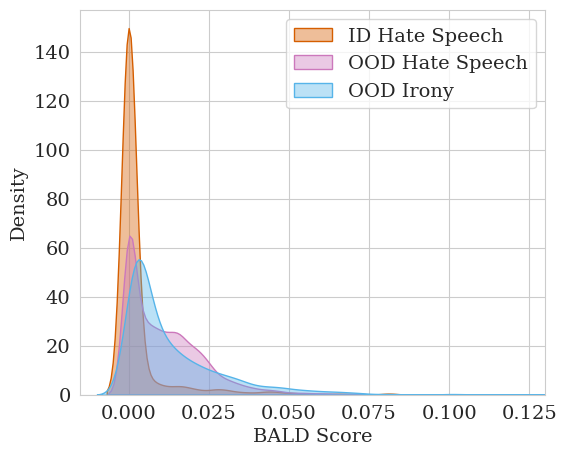

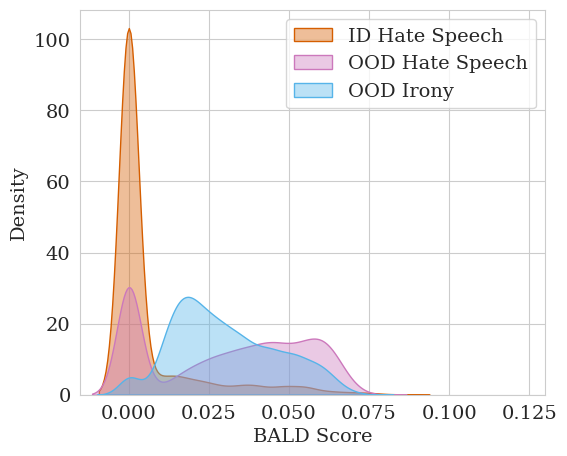

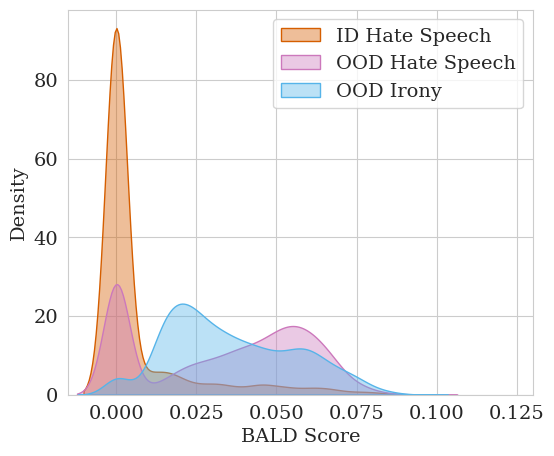

In [22]:
for bald, bald_hs, bald_ol, bald_ir, model in zip([bald_teacher, bald_student, bald_augmented_student], [bald_teacher_hs, bald_student_hs, bald_augmented_student_hs], [bald_teacher_ol, bald_student_ol, bald_augmented_student_ol], [bald_teacher_ir, bald_student_ir, bald_augmented_student_ir], ['teacher', 'student', 'augmented_student']):
    plot_bald_distribution(bald, bald_hs, bald_ol, bald_ir)
    if SAVE_PLOTS:
        plt.tight_layout()
        plt.savefig(os.path.join(save_path, f'plot_bald_distribution_{model}.pdf'))
        plt.close()

In [23]:
colors = [sns.color_palette()[7], sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2]]

# compute relative mean bald
relative_mean_bald_teacher_reference = 1.0
relative_mean_bald_student_reference = 1.0
relative_mean_bald_augmented_student_reference = 1.0

relative_mean_bald_teacher_hs = np.mean(bald_teacher_hs) / np.mean(bald_teacher)
relative_mean_bald_student_hs = np.mean(bald_student_hs) / np.mean(bald_student)
relative_mean_bald_augmented_student_hs = np.mean(bald_augmented_student_hs) / np.mean(bald_augmented_student)

relative_mean_bald_teacher_ol = np.mean(bald_teacher_ol) / np.mean(bald_teacher)
relative_mean_bald_student_ol = np.mean(bald_student_ol) / np.mean(bald_student)
relative_mean_bald_augmented_student_ol = np.mean(bald_augmented_student_ol) / np.mean(bald_augmented_student)

relative_mean_bald_teacher_ir = np.mean(bald_teacher_ir) / np.mean(bald_teacher)
relative_mean_bald_student_ir = np.mean(bald_student_ir) / np.mean(bald_student)
relative_mean_bald_augmented_student_ir = np.mean(bald_augmented_student_ir) / np.mean(bald_augmented_student)

In [24]:
palette = [sns.color_palette()[3], sns.color_palette()[4], sns.color_palette()[6]]

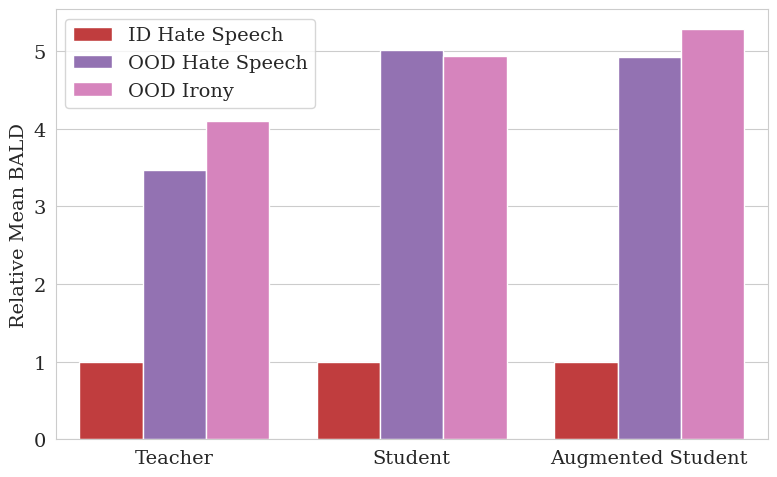

In [25]:
import pandas as pd

plt.figure(figsize=(8,5))

models = ['Teacher', 'Student', 'Augmented Student']
conditions = ['Reference', 'HS', 'IR']
data = {
    'Model': [],
    'Condition': [],
    'Relative Mean BALD': []
}

for model in models:
    for condition in conditions:
        value_name = f'relative_mean_bald_{model.lower().replace(" ", "_")}_{condition.lower()}'
        value = locals()[value_name]
        data['Model'].append(model)
        data['Condition'].append(condition)
        data['Relative Mean BALD'].append(value)

df = pd.DataFrame(data)

bp = sns.barplot(data=df, x='Model', y='Relative Mean BALD', hue='Condition',
            palette=palette)

handles, _ = bp.get_legend_handles_labels()
bp.legend(handles=handles, labels=['ID Hate Speech', 'OOD Hate Speech', 'OOD Irony'])

plt.xlabel('')
plt.ylabel('Relative Mean BALD')
plt.tight_layout()

if SAVE_PLOTS:
    plt.tight_layout()
    plt.savefig(os.path.join(save_path, 'barplot_relative_mean_bald.pdf'))
    plt.close()

#### Predictive Entropy

predictive entropy histogram on known and OOD inputs 

In [26]:
from scipy.stats import entropy

teacher_entropy = [entropy([p, 1-p])  for p in results_teacher['y_prob']]
student_entropy = [entropy([p, 1-p])  for p in results_student['y_prob']]
augmented_student_entropy = [entropy([p, 1-p])  for p in results_augmented_student['y_prob']]

# hs
teacher_entropy_hs = [entropy([p, 1-p])  for p in results_teacher_hs['y_prob']]
student_entropy_hs = [entropy([p, 1-p])  for p in results_student_hs['y_prob']]
augmented_student_entropy_hs = [entropy([p, 1-p])  for p in results_augmented_student_hs['y_prob']]

# ol
teacher_entropy_ol = [entropy([p, 1-p])  for p in results_teacher_ol['y_prob']]
student_entropy_ol = [entropy([p, 1-p])  for p in results_student_ol['y_prob']]
augmented_student_entropy_ol = [entropy([p, 1-p])  for p in results_augmented_student_ol['y_prob']]

# irony
teacher_entropy_ir = [entropy([p, 1-p])  for p in results_teacher_ir['y_prob']]
student_entropy_ir = [entropy([p, 1-p])  for p in results_student_ir['y_prob']]
augmented_student_entropy_ir = [entropy([p, 1-p])  for p in results_augmented_student_ir['y_prob']]

In [27]:
# plot distribution of predictive entropy per dataset across models
# for a dataset, plot the predictive entropy of the models
def plot_predictive_entropy(teacher_entropy, student_entropy, augmented_student_entropy):
    # deprecated in favor of func below
    fig = plt.figure(figsize=(6,5))
    teacher_mean = np.mean(teacher_entropy)
    student_mean = np.mean(student_entropy)
    augmented_student_mean = np.mean(augmented_student_entropy)
    sns.kdeplot(teacher_entropy, label=f'Teacher ({teacher_mean:.3f})', shade=False, lw=3)
    sns.kdeplot(student_entropy, label=f'Student ({student_mean:.3f})', shade=False, lw=3)
    sns.kdeplot(augmented_student_entropy, label=f'Augmented Student ({augmented_student_mean:.3f})', shade=False, lw=3)
    plt.xlabel('Predictive Entropy')
    plt.ylabel('Density')
    plt.ylim(0,10)
    plt.legend()

In [28]:
def plot_predictive_entropy_distribution(entropy, entropy_hs, entropy_ir, color):
    fig = plt.figure(figsize=(6,5))
    iid_hs_mean = np.mean(entropy)
    ood_hs_mean = np.mean(entropy_hs)
    ood_ir_mean = np.mean(entropy_ir)
    sns.kdeplot(entropy, label=f'ID Hate Speech ({iid_hs_mean:.3f})', fill=False, color=color, lw=3, linestyle='-')
    sns.kdeplot(entropy_hs, label=f'OOD Hate Speech ({ood_hs_mean:.3f})', fill=False, color=color, lw=3, linestyle='--')
    sns.kdeplot(entropy_ir, label=f'OOD Irony ({ood_ir_mean:.3f})', fill=False, color=color, lw=3, linestyle=':')
    plt.xlabel('Entropy')
    plt.ylabel('Density')
    plt.legend(loc='upper right')

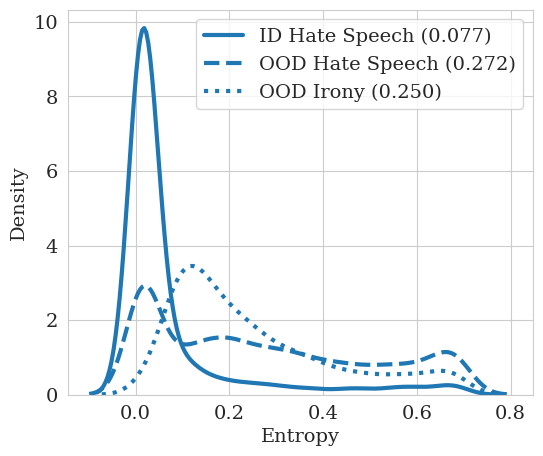

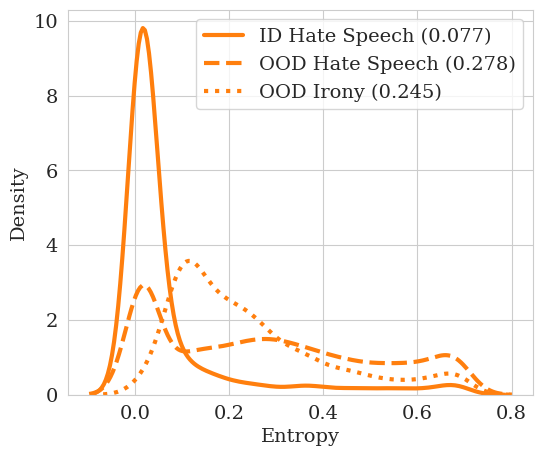

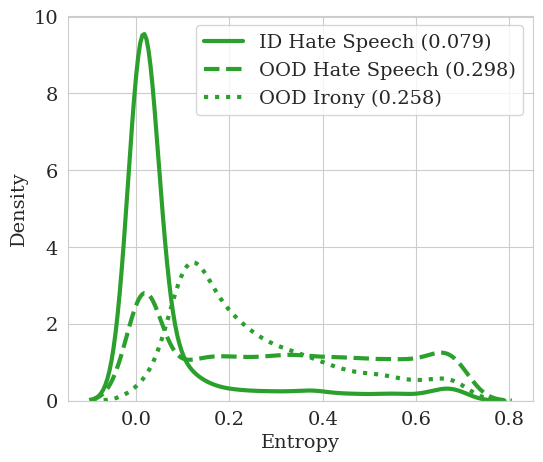

In [29]:
for entropy, entropy_hs, entropy_ir, color, model in zip([teacher_entropy, student_entropy, augmented_student_entropy], [teacher_entropy_hs, student_entropy_hs, augmented_student_entropy_hs], [teacher_entropy_ir, student_entropy_ir, augmented_student_entropy_ir], [sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2]], ['teacher', 'student', 'augmented_student']):
    plot_predictive_entropy_distribution(entropy, entropy_hs, entropy_ir, color)
    if SAVE_PLOTS:
        plt.tight_layout()
        plt.savefig(os.path.join(save_path, f'plot_predictive_entropy_distribution_{model}.pdf'))
        plt.close()